In [1]:
import torch
import numpy as np

In [2]:
def neurons(X,w,b):
    z=torch.mm(X,w)+b
    return F.relu(z)

In [3]:
#手动实现sigmoid激活函数
input_x = torch.randn(4)
input_x

tensor([ 0.0785, -1.5758, -0.3177, -1.0166])

In [4]:
def sigmoid(x):   #sigmoid 做归一化
    return 1.0/(1.0+np.exp(-x))
sigmoid(input_x)

tensor([0.5196, 0.1714, 0.4212, 0.2657])

In [5]:
#调用pytorch 实现sigmoid激活函数
output=torch.sigmoid(input_x)
print(output)

tensor([0.5196, 0.1714, 0.4212, 0.2657])


In [ ]:
## 作业1  根据不同的任务尝试一下不同的激活函数


##手动实现前馈神经网络

def train(net,train_iter,loss_func,num_epochs,lr=None,optimizer=None):
    train_loss_list=[]
    test_loss_list=[]
    for epoch in range(num_epochs):
        train_1_sum,train_acc_sum,n,c=0.0,0.0,0,0
        for X,y in train_iter:
            

In [13]:
num_inputs = 500
n_train=7000
n_test=3000
true_w,true_b=torch.ones(num_inputs,1)*0.01,0.05
#生成数据集
features = torch.randn((n_train+n_test,num_inputs))
labels = torch.matmul(features,true_w)+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)
train_features,test_features=features[:n_train,:],features[n_train:,:]
train_labels,test_labels=labels[:n_train],labels[n_train:]
print(train_features[0][:5])#输出第一个样本特征向量的前五维的元素
print(train_features.shape)
print(train_labels[0])#输出第一个样本的labels 即y
print(train_labels.shape)

tensor([-1.2331, -0.6159, -1.7241,  0.2290,  0.7146])
torch.Size([7000, 500])
tensor([0.1176])
torch.Size([7000, 1])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



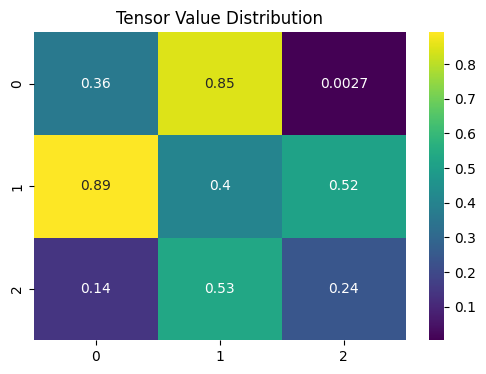

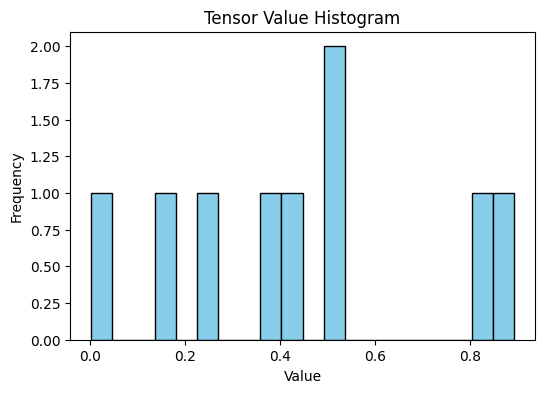

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 生成一个随机的3x3的张量
tensor = np.random.rand(3, 3)

# 显示张量的数值分布
plt.figure(figsize=(6, 4))
sns.heatmap(tensor, annot=True, cmap='viridis', cbar=True)
plt.title('Tensor Value Distribution')
plt.show()

# 显示张量的直方图
plt.figure(figsize=(6, 4))
plt.hist(tensor.flatten(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Tensor Value Histogram')
plt.show()


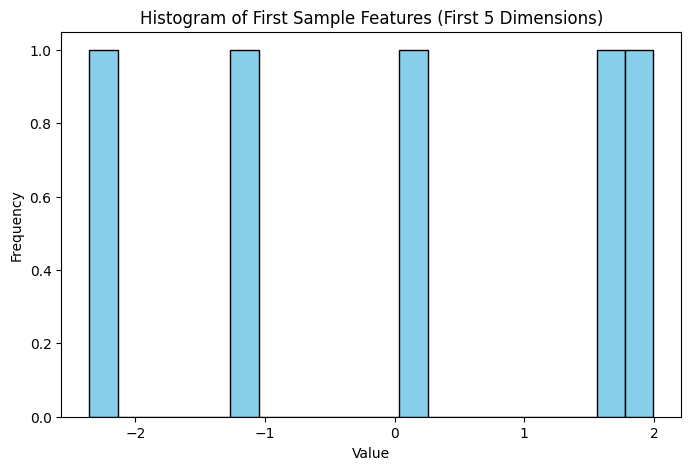

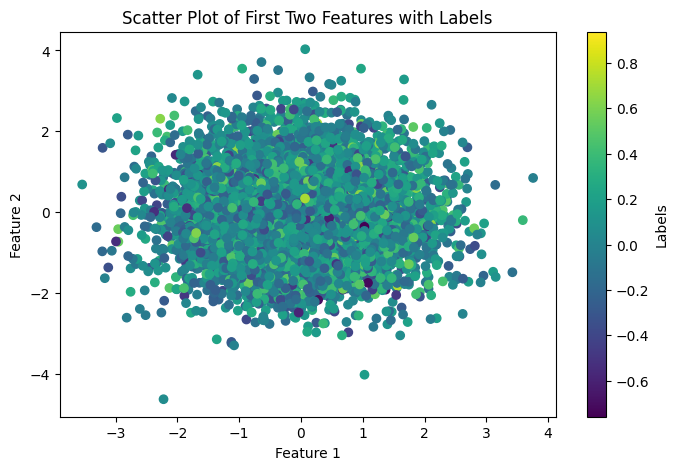

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

num_inputs = 500
n_train = 7000
n_test = 3000
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

# 生成数据集
features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

# 将Tensor转换成NumPy数组
train_features_np = train_features.numpy()
train_labels_np = train_labels.numpy()

# 可视化第一个样本特征向量的前五维元素的直方图
plt.figure(figsize=(8, 5))
plt.hist(train_features_np[0, :5], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of First Sample Features (First 5 Dimensions)')
plt.show()

# 可视化前两个特征的散点图
plt.figure(figsize=(8, 5))
plt.scatter(train_features_np[:, 0], train_features_np[:, 1], c=train_labels_np, cmap='viridis')
plt.colorbar(label='Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of First Two Features with Labels')
plt.show()


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
##利用torch.nn实现前馈神经网络解决上述回归，二分类、多分类问题
# 定义前馈神经网络模型
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
num_inputs = 500
# 定义模型超参数
input_size = num_inputs
hidden_size = 100
output_size = 1
learning_rate = 0.01
num_epochs = 1000

# 初始化模型
model = FeedforwardNN(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 转换数据为PyTorch的张量
train_features = torch.tensor(train_features, dtype=torch.float)
train_labels = torch.tensor(train_labels, dtype=torch.float)

# 训练模型
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(train_features)
    loss = criterion(outputs, train_labels)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 使用测试集评估模型
test_features = torch.tensor(test_features, dtype=torch.float)
test_labels = torch.tensor(test_labels, dtype=torch.float)
with torch.no_grad():
    test_outputs = model(test_features)
    test_loss = criterion(test_outputs, test_labels)
print(f'Test Loss: {test_loss.item():.4f}')



/tmp/ipykernel_238087/1618745484.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_features = torch.tensor(train_features, dtype=torch.float)
/tmp/ipykernel_238087/1618745484.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.float)


Epoch [10/1000], Loss: 0.0799
Epoch [20/1000], Loss: 0.0752
Epoch [30/1000], Loss: 0.0716
Epoch [40/1000], Loss: 0.0684
Epoch [50/1000], Loss: 0.0655
Epoch [60/1000], Loss: 0.0629
Epoch [70/1000], Loss: 0.0605
Epoch [80/1000], Loss: 0.0582
Epoch [90/1000], Loss: 0.0562
Epoch [100/1000], Loss: 0.0543
Epoch [110/1000], Loss: 0.0526
Epoch [120/1000], Loss: 0.0510
Epoch [130/1000], Loss: 0.0495
Epoch [140/1000], Loss: 0.0480
Epoch [150/1000], Loss: 0.0467
Epoch [160/1000], Loss: 0.0455
Epoch [170/1000], Loss: 0.0443
Epoch [180/1000], Loss: 0.0432
Epoch [190/1000], Loss: 0.0421
Epoch [200/1000], Loss: 0.0411
Epoch [210/1000], Loss: 0.0401
Epoch [220/1000], Loss: 0.0392
Epoch [230/1000], Loss: 0.0383
Epoch [240/1000], Loss: 0.0375
Epoch [250/1000], Loss: 0.0367
Epoch [260/1000], Loss: 0.0359
Epoch [270/1000], Loss: 0.0352
Epoch [280/1000], Loss: 0.0345
Epoch [290/1000], Loss: 0.0338
Epoch [300/1000], Loss: 0.0331
Epoch [310/1000], Loss: 0.0324
Epoch [320/1000], Loss: 0.0318
Epoch [330/1000],

/tmp/ipykernel_238087/1618745484.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_features = torch.tensor(test_features, dtype=torch.float)
/tmp/ipykernel_238087/1618745484.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels = torch.tensor(test_labels, dtype=torch.float)


In [18]:
test_features.shape

torch.Size([3000, 500])

In [25]:
X_train1[0].shape

(200,)

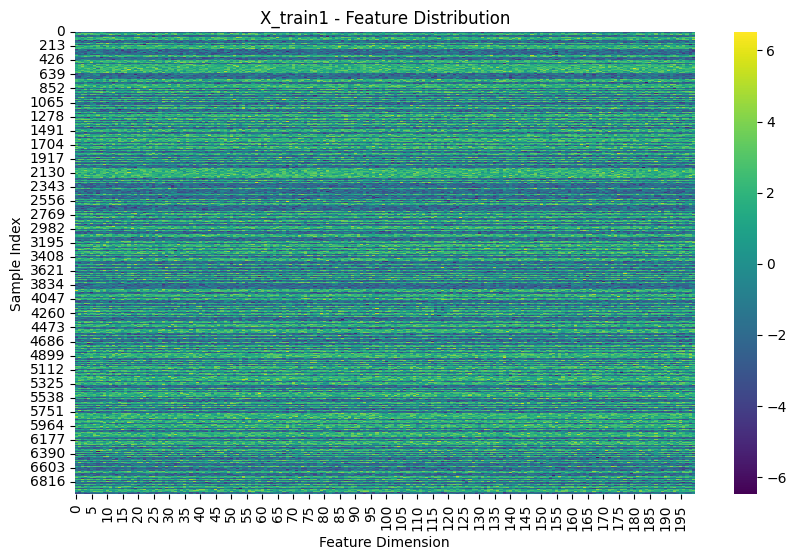

In [26]:
import seaborn as sns

# 绘制 X_train1 的特征维度的热图
plt.figure(figsize=(10, 6))
sns.heatmap(X_train1, cmap='viridis')
plt.xlabel('Feature Dimension')
plt.ylabel('Sample Index')
plt.title('X_train1 - Feature Distribution')
plt.show()


In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 定义前馈神经网络模型
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 定义模型超参数
input_size = feature_dim
hidden_size = 100
output_size = 1
learning_rate = 0.01
num_epochs = 100

# 初始化模型
model = FeedforwardNN(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 转换数据为PyTorch的张量
X_train = torch.tensor(X_train1, dtype=torch.float)
y_train = torch.tensor(y_train1, dtype=torch.float)
X_test = torch.tensor(X_test1, dtype=torch.float)
y_test = torch.tensor(y_test1, dtype=torch.float)

# 训练模型
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train.unsqueeze(1))
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 使用测试集评估模型
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test.unsqueeze(1))

#计算测试集准确率
def accuracy(predictions, labels):
    
    rounded_predictions = torch.round(torch.sigmoid(predictions))
#     print(rounded_predictions.view(-1).shape)
#     print("label+",labels.shape)
#     print((rounded_predictions.view(-1) == labels).shape)
    correct = (rounded_predictions.view(-1) == labels).sum().item()
    total = labels.size(0)
    return correct / total



test_accuracy = accuracy(test_outputs, y_test)
print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch [10/1000], Loss: 0.6990
Epoch [20/1000], Loss: 0.6986
Epoch [30/1000], Loss: 0.6983
Epoch [40/1000], Loss: 0.6980
Epoch [50/1000], Loss: 0.6976
Epoch [60/1000], Loss: 0.6974
Epoch [70/1000], Loss: 0.6971
Epoch [80/1000], Loss: 0.6968
Epoch [90/1000], Loss: 0.6966
Epoch [100/1000], Loss: 0.6964
Epoch [110/1000], Loss: 0.6961
Epoch [120/1000], Loss: 0.6959
Epoch [130/1000], Loss: 0.6957
Epoch [140/1000], Loss: 0.6955
Epoch [150/1000], Loss: 0.6953
Epoch [160/1000], Loss: 0.6951
Epoch [170/1000], Loss: 0.6950
Epoch [180/1000], Loss: 0.6948
Epoch [190/1000], Loss: 0.6946
Epoch [200/1000], Loss: 0.6944
Epoch [210/1000], Loss: 0.6943
Epoch [220/1000], Loss: 0.6941
Epoch [230/1000], Loss: 0.6940
Epoch [240/1000], Loss: 0.6938
Epoch [250/1000], Loss: 0.6937
Epoch [260/1000], Loss: 0.6936
Epoch [270/1000], Loss: 0.6934


KeyboardInterrupt: 

In [31]:
test_outputs

tensor([[-0.1272],
        [-0.0877],
        [ 0.1972],
        ...,
        [ 0.4419],
        [ 0.0711],
        [-0.1335]])

In [40]:
torch.sigmoid(test_outputs)

In [46]:
rounded_predictions=torch.round(torch.sigmoid(test_outputs))

In [34]:
labels.size(0)

10000

In [36]:
y_test.shape

torch.Size([3000])

In [48]:
rounded_predictions == labels

RuntimeError: The size of tensor a (3000) must match the size of tensor b (10000) at non-singleton dimension 0

In [47]:
rounded_predictions

tensor([[0.],
        [1.],
        [0.],
        ...,
        [1.],
        [1.],
        [0.]])